**VERİ ÖNİŞLEME**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error, precision_score, recall_score,accuracy_score
from typing import Tuple, List, Dict
import random

data = pd.read_csv("C:/Users/yulas/Desktop/DataM_proje/Recsys/sustainable_fashion_dataset.csv", sep=";", encoding="ISO-8859-1")

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Brand_Name                  5500 non-null   object
 1   Sustainability_Rating       5500 non-null   object
 2   Material_Type               5500 non-null   object
 3   Eco_Friendly_Manufacturing  5500 non-null   object
 4   Carbon_Footprint_MT         5500 non-null   object
 5   Water_Usage_Liters          5500 non-null   object
 6   Waste_Production_KG         5500 non-null   object
 7   Recycling_Programs          5500 non-null   object
 8   Average_Price_USD           5500 non-null   object
 9   Product_Category            5500 non-null   object
dtypes: object(10)
memory usage: 429.8+ KB


In [3]:
data.head()

,Brand_Name,Sustainability_Rating,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Recycling_Programs,Average_Price_USD,Product_Category
0,Brand_1,D,Tencel,No,"1,75","4511152,79","97844,11",No,"38,33",Sweater
1,Brand_2,D,Vegan Leather,Yes,"124,39","1951566,31","37267,75",No,"250,07",Sweater
2,Brand_3,A,Vegan Leather,No,"336,66","467454,52","38385,92",No,"146,16",Shirt
3,Brand_4,D,Bamboo Fabric,No,"152,04","899576,9","32665,45",No,"165,52",Blouse
4,Brand_5,D,Bamboo Fabric,Yes,"415,63","1809219,9","37295,47",Yes,"211,63",Blouse



Eksik Verilerin Sütun Bazlı Kontrolü

Encoding İşlemi

In [4]:
categorical_columns = ['Sustainability_Rating', 'Material_Type', 
                       'Eco_Friendly_Manufacturing', 'Recycling_Programs','Product_Category']

for col in categorical_columns:
    data[col] = data[col].str.strip().str.upper()

print("\nKategorik sütunların ilk 5 değeri:")
for col in categorical_columns:
    print(f"{col} örnek değerler:\n{data[col].unique()}\n")



Kategorik sütunların ilk 5 değeri:
Sustainability_Rating örnek değerler:
['D' 'A' 'B' 'C' 'F']

Material_Type örnek değerler:
['TENCEL' 'VEGAN LEATHER' 'BAMBOO FABRIC' 'RECYCLED POLYESTER' 'HEMP'
 'ORGANIC COTTON' 'SYNTHETIC BLEND' 'NYLON' 'POLYESTER' 'PLASTIC'
 'ACRYLIC']

Eco_Friendly_Manufacturing örnek değerler:
['NO' 'YES']

Recycling_Programs örnek değerler:
['NO' 'YES']

Product_Category örnek değerler:
['SWEATER' 'SHIRT' 'BLOUSE' 'DRESS' 'SOCKS' 'T-SHIRT' 'JACKET' 'CARDIGAN'
 'COAT' 'PAJAMAS' 'SCARF' 'HAT']



In [5]:
# One-Hot Encoding
data = pd.get_dummies(data, columns=categorical_columns, dtype=int)

In [6]:
data.head()


,Brand_Name,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Average_Price_USD,Sustainability_Rating_A,Sustainability_Rating_B,Sustainability_Rating_C,Sustainability_Rating_D,Sustainability_Rating_F,...,Product_Category_COAT,Product_Category_DRESS,Product_Category_HAT,Product_Category_JACKET,Product_Category_PAJAMAS,Product_Category_SCARF,Product_Category_SHIRT,Product_Category_SOCKS,Product_Category_SWEATER,Product_Category_T-SHIRT
0,Brand_1,"1,75","4511152,79","97844,11","38,33",0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,Brand_2,"124,39","1951566,31","37267,75","250,07",0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,Brand_3,"336,66","467454,52","38385,92","146,16",1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,Brand_4,"152,04","899576,9","32665,45","165,52",0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Brand_5,"415,63","1809219,9","37295,47","211,63",0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Veri Tipi Kontrolü ve Düzeltmeler

In [7]:
print("\nVeri çerçevesindeki sütunların veri tipleri:")
print(data.dtypes)


Veri çerçevesindeki sütunların veri tipleri:
Brand_Name                          object
Carbon_Footprint_MT                 object
Water_Usage_Liters                  object
Waste_Production_KG                 object
Average_Price_USD                   object
Sustainability_Rating_A              int32
Sustainability_Rating_B              int32
Sustainability_Rating_C              int32
Sustainability_Rating_D              int32
Sustainability_Rating_F              int32
Material_Type_ACRYLIC                int32
Material_Type_BAMBOO FABRIC          int32
Material_Type_HEMP                   int32
Material_Type_NYLON                  int32
Material_Type_ORGANIC COTTON         int32
Material_Type_PLASTIC                int32
Material_Type_POLYESTER              int32
Material_Type_RECYCLED POLYESTER     int32
Material_Type_SYNTHETIC BLEND        int32
Material_Type_TENCEL                 int32
Material_Type_VEGAN LEATHER          int32
Eco_Friendly_Manufacturing_NO        int32
Eco_Frie

In [8]:
data['Average_Price_USD'] = data['Average_Price_USD'].str.replace(',', '.').astype(float)

In [9]:
data['Carbon_Footprint_MT'] = data['Carbon_Footprint_MT'].str.replace(',', '.').astype(float)

In [10]:
data['Water_Usage_Liters'] = data['Water_Usage_Liters'].str.replace(',', '.').astype(float)

In [11]:
data['Waste_Production_KG'] = data['Waste_Production_KG'].str.replace(',', '.').astype(float)

In [12]:
print("\nVeri çerçevesindeki sütunların veri tipleri:")
print(data.dtypes)


Veri çerçevesindeki sütunların veri tipleri:
Brand_Name                           object
Carbon_Footprint_MT                 float64
Water_Usage_Liters                  float64
Waste_Production_KG                 float64
Average_Price_USD                   float64
Sustainability_Rating_A               int32
Sustainability_Rating_B               int32
Sustainability_Rating_C               int32
Sustainability_Rating_D               int32
Sustainability_Rating_F               int32
Material_Type_ACRYLIC                 int32
Material_Type_BAMBOO FABRIC           int32
Material_Type_HEMP                    int32
Material_Type_NYLON                   int32
Material_Type_ORGANIC COTTON          int32
Material_Type_PLASTIC                 int32
Material_Type_POLYESTER               int32
Material_Type_RECYCLED POLYESTER      int32
Material_Type_SYNTHETIC BLEND         int32
Material_Type_TENCEL                  int32
Material_Type_VEGAN LEATHER           int32
Eco_Friendly_Manufacturing_NO 

In [13]:
data

,Brand_Name,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Average_Price_USD,Sustainability_Rating_A,Sustainability_Rating_B,Sustainability_Rating_C,Sustainability_Rating_D,Sustainability_Rating_F,...,Product_Category_COAT,Product_Category_DRESS,Product_Category_HAT,Product_Category_JACKET,Product_Category_PAJAMAS,Product_Category_SCARF,Product_Category_SHIRT,Product_Category_SOCKS,Product_Category_SWEATER,Product_Category_T-SHIRT
0,Brand_1,1.75,4511152.79,97844.11,38.330,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,Brand_2,124.39,1951566.31,37267.75,250.070,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,Brand_3,336.66,467454.52,38385.92,146.160,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,Brand_4,152.04,899576.90,32665.45,165.520,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Brand_5,415.63,1809219.90,37295.47,211.630,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,altlife,750.00,6200000.00,270000.00,4.537,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5496,infuse,750.00,6200000.00,270000.00,6.747,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5497,rare,650.00,5800000.00,240000.00,8.268,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
5498,magre,750.00,6200000.00,270000.00,13.507,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


Temizlenmiş Datanın Kaydedilmesi

In [14]:
data.to_csv("data.csv", index=False)

**VERİYE BAKIŞ**

In [15]:
def analyze_product_categories(df):
    # Tüm ürün kategorilerini bulalım
    product_categories = [col for col in df.columns if col.startswith('Product_Category_')]
    
    # Her kategori için analiz sonuçlarını saklayacağımız liste
    category_stats = []
    
    for category in product_categories:
        # Kategori adını temizleyelim
        category_name = category.replace('Product_Category_', '')
        
        # Bu kategorideki ürünleri filtreleyelim
        category_products = df[df[category] == 1]
        
        if len(category_products) > 0:
            stats = {
                'Kategori': category_name,
                'Ürün Sayısı': len(category_products),
                'Ortalama Fiyat': category_products['Average_Price_USD'].mean(),
                'Ortalama Karbon Ayak İzi': category_products['Carbon_Footprint_MT'].mean(),
                'Ortalama Su Kullanımı': category_products['Water_Usage_Liters'].mean(),
                'Sürdürülebilirlik A Oranı': (category_products['Sustainability_Rating_A'].sum() / len(category_products)) * 100,
                'Eko-Dostu Üretim Oranı': (category_products['Eco_Friendly_Manufacturing_YES'].sum() / len(category_products)) * 100
            }
            category_stats.append(stats)
    
    # Sonuçları DataFrame'e çevirelim
    results_df = pd.DataFrame(category_stats)
    
    # Sayısal sütunları yuvarla
    results_df = results_df.round(2)
    
    # Ürün sayısına göre sırala
    results_df = results_df.sort_values('Ürün Sayısı', ascending=False)
    
    return results_df

# Örnek kullanım:
df = data
results = analyze_product_categories(df)
print(results)

    Kategori  Ürün Sayısı  Ortalama Fiyat  Ortalama Karbon Ayak İzi  \
9      SOCKS          494          236.60                    290.18   
7      SCARF          483          237.60                    283.96   
4        HAT          482          234.31                    307.31   
3      DRESS          469          244.19                    300.79   
0     BLOUSE          464          232.79                    285.00   
5     JACKET          460          235.43                    296.41   
10   SWEATER          460          244.52                    261.33   
2       COAT          459          234.86                    293.15   
6    PAJAMAS          443          225.98                    295.66   
11   T-SHIRT          435          244.34                    265.86   
8      SHIRT          429          243.94                    310.90   
1   CARDIGAN          422          235.35                    306.72   

    Ortalama Su Kullanımı  Sürdürülebilirlik A Oranı  Eko-Dostu Üretim Oranı

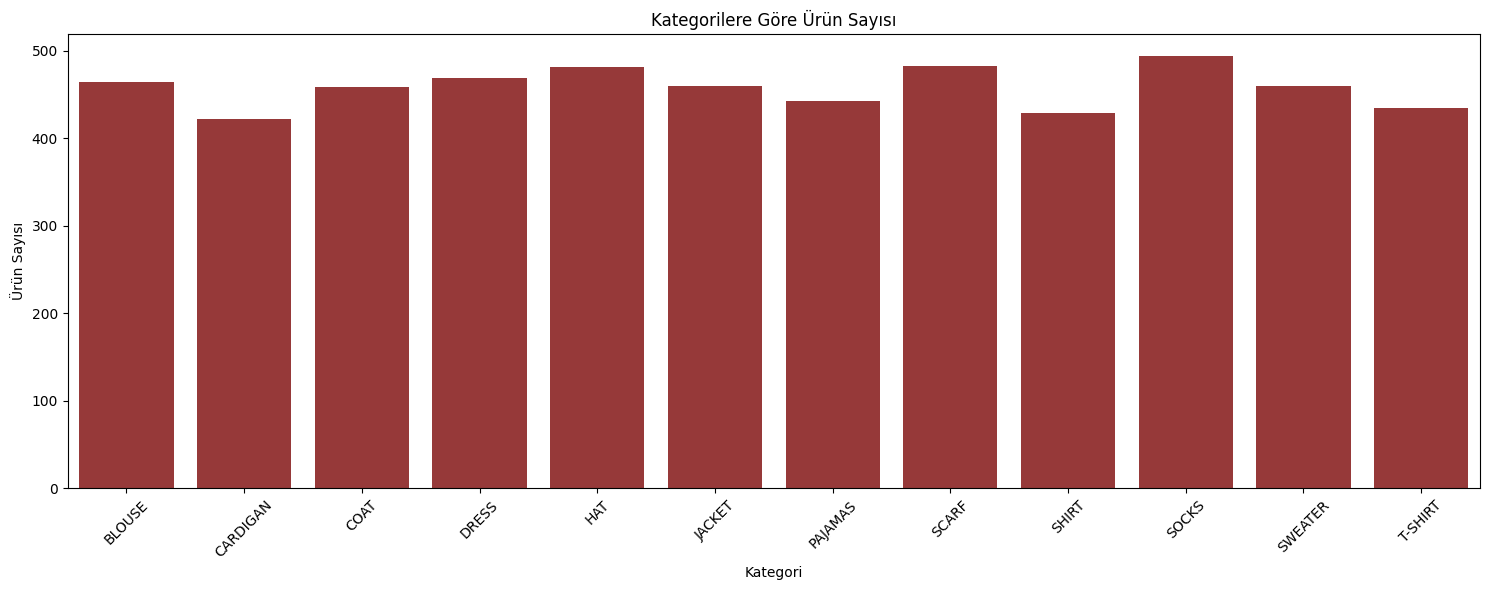

In [16]:
def analyze_product_categories(df):
    product_cols = [col for col in df.columns if col.startswith('Product_Category_')]
    results = []
    
    for col in product_cols:
        category = col.replace('Product_Category_', '')
        category_items = df[df[col] == 1]
        
        if len(category_items) > 0:
            basic_metrics = {
                'Kategori': category,
                'Ürün Sayısı': len(category_items),
            }
            
            rating_metrics = {
                'A Rating (%)': (category_items['Sustainability_Rating_A'].sum() / len(category_items)) * 100,
                'B Rating (%)': (category_items['Sustainability_Rating_B'].sum() / len(category_items)) * 100,
                'C Rating (%)': (category_items['Sustainability_Rating_C'].sum() / len(category_items)) * 100,
                'D Rating (%)': (category_items['Sustainability_Rating_D'].sum() / len(category_items)) * 100,
                'F Rating (%)': (category_items['Sustainability_Rating_F'].sum() / len(category_items)) * 100
            }

            metrics = {**basic_metrics, **rating_metrics}
            results.append(metrics)
    
    results_df = pd.DataFrame(results)
    return results_df

def plot_basic_metrics(results_df):
    plt.figure(figsize=(15, 6))
    sns.barplot(data=results_df, x='Kategori', y='Ürün Sayısı', color = "brown")
    plt.title('Kategorilere Göre Ürün Sayısı')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage:
if __name__ == "__main__":
    # Import data
    df = data
    
    # Run analysis
    results = analyze_product_categories(df)
    
    # Create visualizations
    plot_basic_metrics(results)


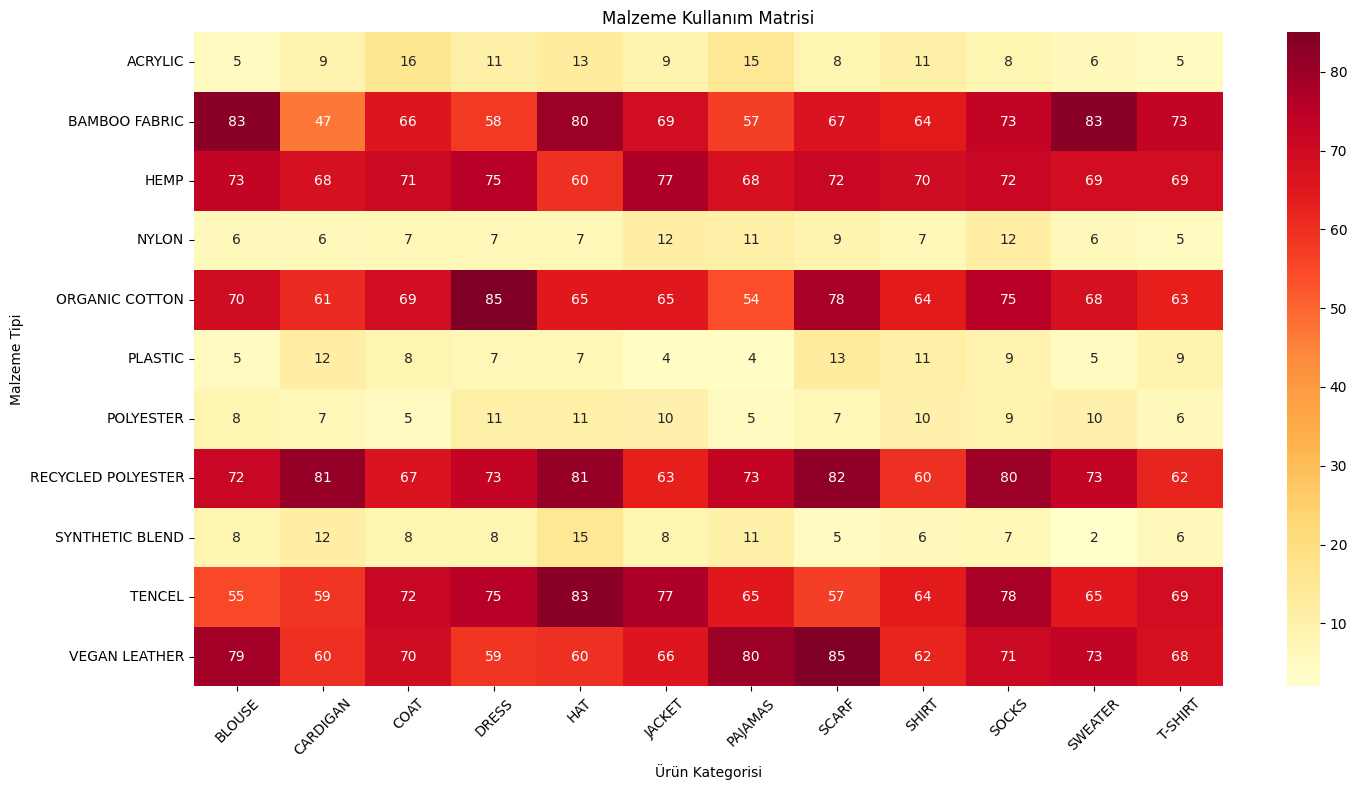

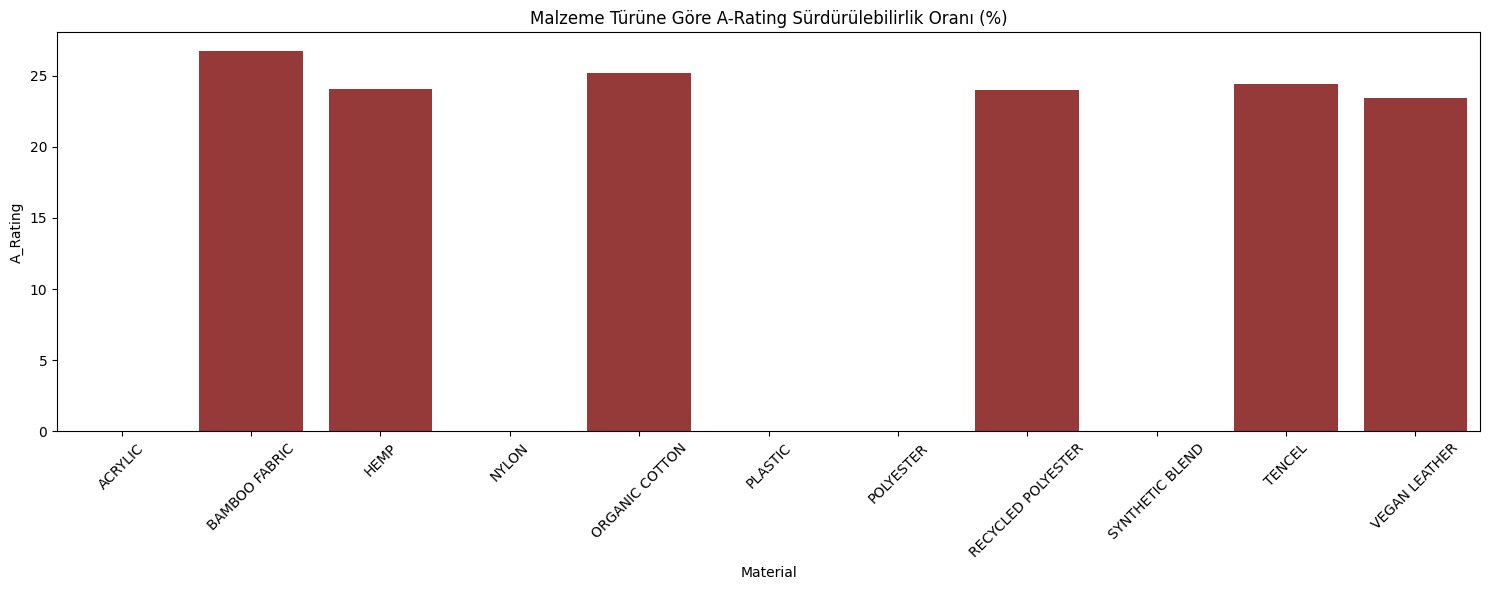

C:\Users\yulas\AppData\Local\Temp\ipykernel_19372\3536530510.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
C:\Users\yulas\AppData\Local\Temp\ipykernel_19372\3536530510.py:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


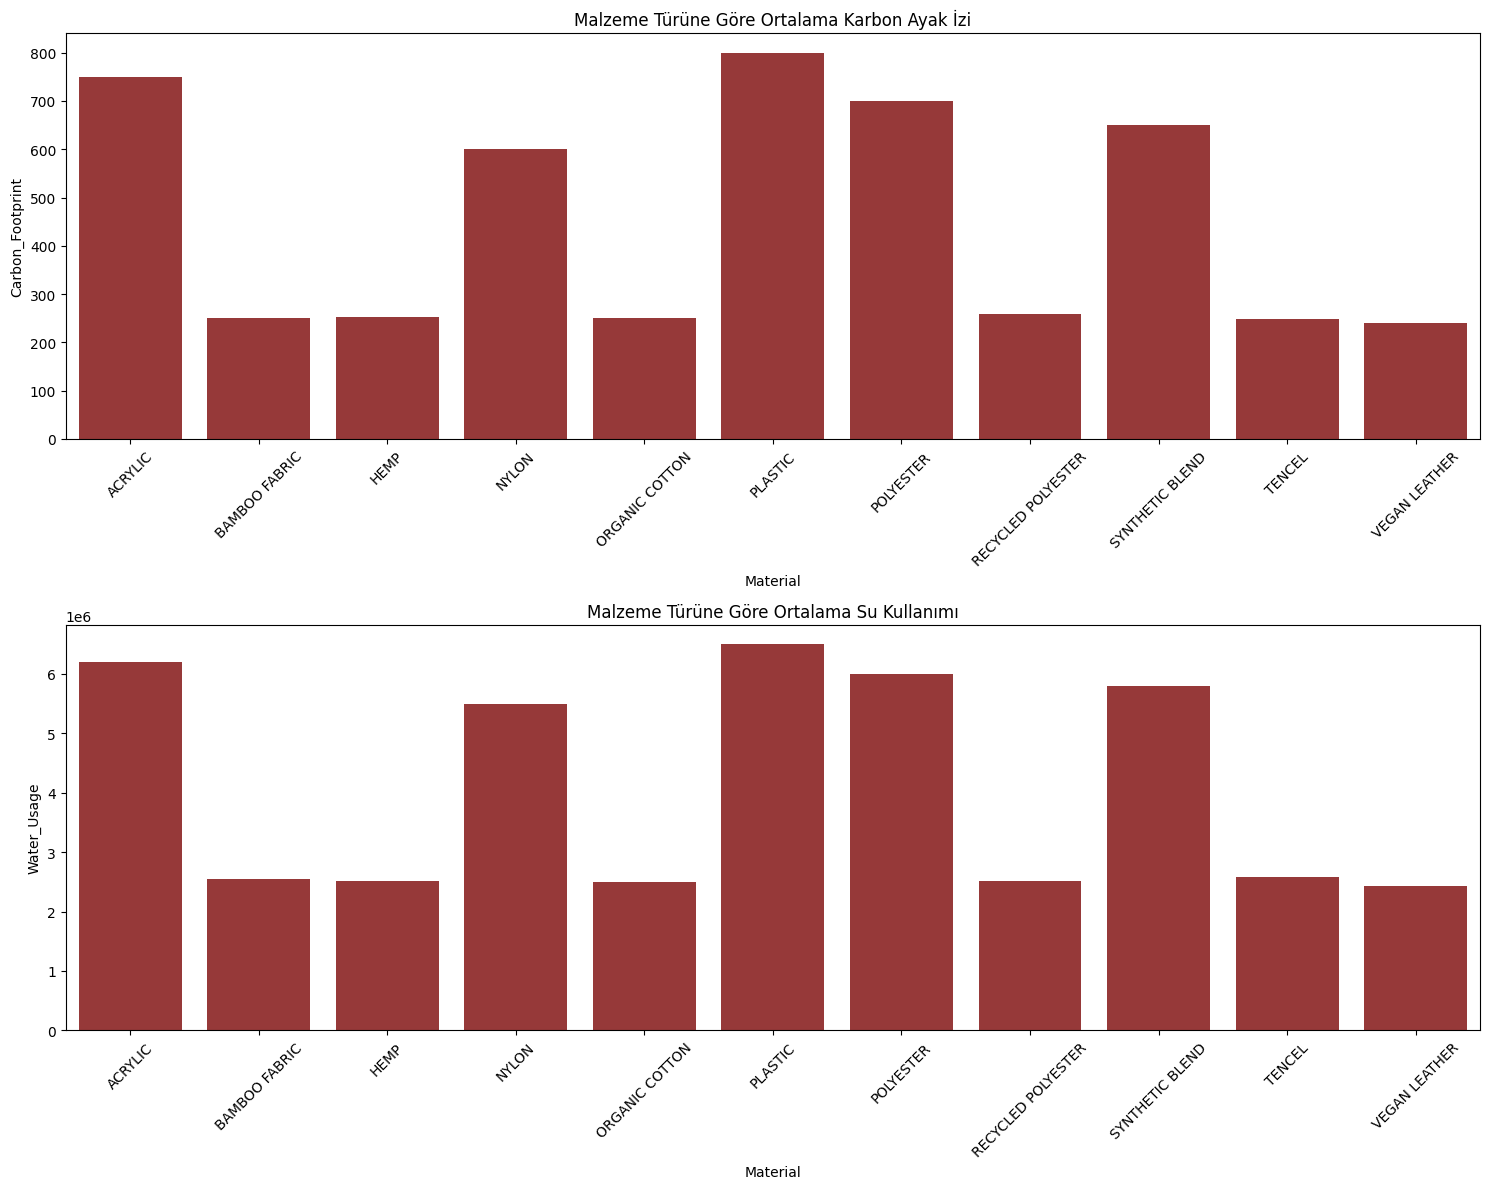


=== MALZEME VE ÜRÜN ANALİZİ ÖZET ===

En Yaygın Malzeme Kullanımları:
BLOUSE: BAMBOO FABRIC (83 ürün)
CARDIGAN: RECYCLED POLYESTER (81 ürün)
COAT: TENCEL (72 ürün)
DRESS: ORGANIC COTTON (85 ürün)
HAT: TENCEL (83 ürün)
JACKET: HEMP (77 ürün)
PAJAMAS: VEGAN LEATHER (80 ürün)
SCARF: VEGAN LEATHER (85 ürün)
SHIRT: HEMP (70 ürün)
SOCKS: RECYCLED POLYESTER (80 ürün)
SWEATER: BAMBOO FABRIC (83 ürün)
T-SHIRT: BAMBOO FABRIC (73 ürün)

Malzeme Sürdürülebilirlik Sıralaması:
BAMBOO FABRIC: 26.7% A-Rating
ORGANIC COTTON: 25.2% A-Rating
TENCEL: 24.4% A-Rating
HEMP: 24.1% A-Rating
RECYCLED POLYESTER: 24.0% A-Rating
VEGAN LEATHER: 23.4% A-Rating
ACRYLIC: 0.0% A-Rating
NYLON: 0.0% A-Rating
PLASTIC: 0.0% A-Rating
POLYESTER: 0.0% A-Rating
SYNTHETIC BLEND: 0.0% A-Rating

Çevresel Etki Analizi:
VEGAN LEATHER: 240.57 MT Karbon, 2427481 L Su
TENCEL: 248.61 MT Karbon, 2587193 L Su
ORGANIC COTTON: 249.75 MT Karbon, 2501109 L Su
BAMBOO FABRIC: 250.51 MT Karbon, 2555925 L Su
HEMP: 252.69 MT Karbon, 2520197 L Su

In [17]:
def analyze_materials_and_products(df):
    # Material type kolonlarını bul
    material_cols = [col for col in df.columns if col.startswith('Material_Type_')]
    product_cols = [col for col in df.columns if col.startswith('Product_Category_')]
    
    # Her ürün kategorisi için malzeme analizi
    material_usage = {}
    
    for product_col in product_cols:
        product_name = product_col.replace('Product_Category_', '')
        product_items = df[df[product_col] == 1]
        
        material_counts = {}
        for material_col in material_cols:
            material_name = material_col.replace('Material_Type_', '')
            material_count = product_items[material_col].sum()
            if material_count > 0:
                material_counts[material_name] = material_count
        
        material_usage[product_name] = material_counts
    
    return material_usage

def analyze_sustainability_by_material(df):
    material_cols = [col for col in df.columns if col.startswith('Material_Type_')]
    results = []
    
    for material_col in material_cols:
        material_name = material_col.replace('Material_Type_', '')
        material_items = df[df[material_col] == 1]
        
        if len(material_items) > 0:
            metrics = {
                'Material': material_name,
                'Count': len(material_items),
                'Avg_Price': material_items['Average_Price_USD'].mean(),
                'Carbon_Footprint': material_items['Carbon_Footprint_MT'].mean(),
                'Water_Usage': material_items['Water_Usage_Liters'].mean(),
                'Waste_Production': material_items['Waste_Production_KG'].mean(),
                'Eco_Friendly': (material_items['Eco_Friendly_Manufacturing_YES'].sum() / len(material_items)) * 100,
                'A_Rating': (material_items['Sustainability_Rating_A'].sum() / len(material_items)) * 100
            }
            results.append(metrics)
    
    return pd.DataFrame(results)

def create_material_analysis_plots(df, material_usage, sustainability_df):
    # 1. Malzeme Kullanım Heatmap'i
    plt.figure(figsize=(15, 8))
    usage_matrix = pd.DataFrame(material_usage).fillna(0)
    sns.heatmap(usage_matrix, annot=True, fmt='.0f', cmap='YlOrRd')
    plt.title('Malzeme Kullanım Matrisi')
    plt.xlabel('Ürün Kategorisi')
    plt.ylabel('Malzeme Tipi')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # 2. Malzeme Türüne Göre Sürdürülebilirlik Analizi
    plt.figure(figsize=(15, 6))
    sns.barplot(data=sustainability_df, x='Material', y='A_Rating', color="brown")
    plt.title('Malzeme Türüne Göre A-Rating Sürdürülebilirlik Oranı (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # 3. Malzeme Türüne Göre Çevresel Etki
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
    
    sns.barplot(data=sustainability_df, x='Material', y='Carbon_Footprint', ax=ax1,color="brown")
    ax1.set_title('Malzeme Türüne Göre Ortalama Karbon Ayak İzi')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
    
    sns.barplot(data=sustainability_df, x='Material', y='Water_Usage', ax=ax2,color="brown")
    ax2.set_title('Malzeme Türüne Göre Ortalama Su Kullanımı')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
    
    plt.tight_layout()
    plt.show()

def calculate_advanced_metrics(df):
    material_cols = [col for col in df.columns if col.startswith('Material_Type_')]
    product_cols = [col for col in df.columns if col.startswith('Product_Category_')]
    
    # 1. Her ürün kategorisi için en yaygın malzeme
    category_material_mapping = {}
    for product_col in product_cols:
        product_name = product_col.replace('Product_Category_', '')
        product_items = df[df[product_col] == 1]
        
        material_counts = {}
        for material_col in material_cols:
            material_name = material_col.replace('Material_Type_', '')
            count = product_items[material_col].sum()
            if count > 0:
                material_counts[material_name] = count
        
        if material_counts:
            most_common = max(material_counts.items(), key=lambda x: x[1])
            category_material_mapping[product_name] = most_common
    
    # 2. Sürdürülebilirlik skoru hesaplama
    df['Sustainability_Score'] = (
        df['Sustainability_Rating_A'] * 5 +
        df['Sustainability_Rating_B'] * 4 +
        df['Sustainability_Rating_C'] * 3 +
        df['Sustainability_Rating_D'] * 2 +
        df['Sustainability_Rating_F'] * 1
    )
    
    return category_material_mapping

def print_analysis_summary(material_usage, sustainability_df, category_material_mapping):
    print("\n=== MALZEME VE ÜRÜN ANALİZİ ÖZET ===\n")
    
    # En yaygın malzemeler
    print("En Yaygın Malzeme Kullanımları:")
    for category, (material, count) in category_material_mapping.items():
        print(f"{category}: {material} ({count} ürün)")
    
    print("\nMalzeme Sürdürülebilirlik Sıralaması:")
    sustainability_ranking = sustainability_df.sort_values('A_Rating', ascending=False)
    for _, row in sustainability_ranking.iterrows():
        print(f"{row['Material']}: {row['A_Rating']:.1f}% A-Rating")
    
    print("\nÇevresel Etki Analizi:")
    impact_analysis = sustainability_df.sort_values('Carbon_Footprint', ascending=True)
    for _, row in impact_analysis.iterrows():
        print(f"{row['Material']}: {row['Carbon_Footprint']:.2f} MT Karbon, {row['Water_Usage']:.0f} L Su")

# Kullanım örneği
if __name__ == "__main__":
    # Veriyi yükle
    df =data
    
    # Analizleri yap
    material_usage = analyze_materials_and_products(df)
    sustainability_df = analyze_sustainability_by_material(df)
    category_material_mapping = calculate_advanced_metrics(df)
    
    # Görselleştirmeleri oluştur
    create_material_analysis_plots(df, material_usage, sustainability_df)
    
    # Özet istatistikleri yazdır
    print_analysis_summary(material_usage, sustainability_df, category_material_mapping)

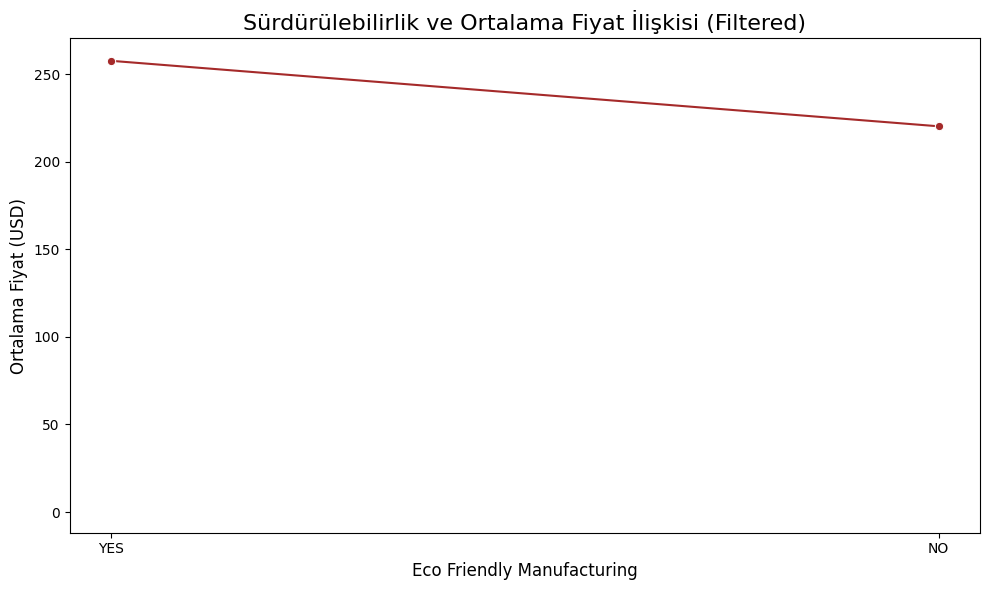

In [18]:
filtered_data = data[
    (data['Eco_Friendly_Manufacturing_NO'] == 1) |
    (data['Eco_Friendly_Manufacturing_YES'] == 1)
]

sustainability_vs_price_filtered = filtered_data.groupby(
    ['Eco_Friendly_Manufacturing_NO', 'Eco_Friendly_Manufacturing_YES']
)['Average_Price_USD'].mean().reset_index()

sustainability_vs_price_filtered['Category'] = sustainability_vs_price_filtered[
    ['Eco_Friendly_Manufacturing_NO', 'Eco_Friendly_Manufacturing_YES']
].apply(lambda row: 'NO' if row['Eco_Friendly_Manufacturing_NO'] == 1 else 'YES', axis=1)

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=sustainability_vs_price_filtered,
    x='Category',
    y='Average_Price_USD',
    marker='o',
    color = "brown"
)

plt.title('Sürdürülebilirlik ve Ortalama Fiyat İlişkisi (Filtered)', fontsize=16)
plt.xlabel('Eco Friendly Manufacturing', fontsize=12)
plt.ylabel('Ortalama Fiyat (USD)', fontsize=12)
plt.plot(True)
plt.tight_layout()
plt.show()

Korelasyon Matrisi

**ÖZELLİK MÜHENDİSLİĞİ**


**Geri Dönüşüm Derecelendirmesi**

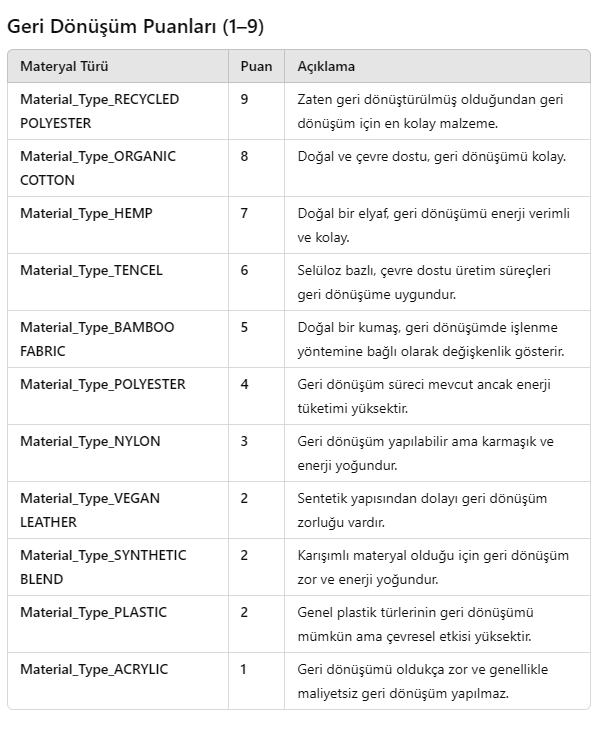

In [19]:

recycling_scores = {
    'HEMP': 7,
    'ORGANIC COTTON': 8,
    'RECYCLED POLYESTER': 9,
    'TENCEL': 6,
    'VEGAN LEATHER': 2,
    'BAMBOO FABRIC': 5,
    'NYLON':3,
    'PLASTIC': 2,
    'POLYESTER': 4 ,
    'SYNTHETIC BLEND':2,
    'ACRYLIC':1 
}

data.columns = [col.replace('-', ' ') for col in data.columns]

data['Recycling_Score'] = 0

for material, score in recycling_scores.items():
    column_name = f"Material_Type_{material.upper()}"
    if column_name in data.columns:
        data['Recycling_Score'] += data[column_name] * score

sorted_data0 = data[['Recycling_Score']].sort_values(by='Recycling_Score', ascending=False)
sorted_data0


,Recycling_Score
3829,9
1567,9
1303,9
4035,9
3846,9
...,...
5363,1
5365,1
5135,1
5373,1


Eco-Friendly Skoru (üretim ve geri dönüşüm programlarına dayalı)

In [20]:
data['Eco_Friendliness_Score'] = 0

data.loc[data['Eco_Friendly_Manufacturing_YES'] == 1, 'Eco_Friendliness_Score'] += 5
data.loc[data['Recycling_Programs_YES'] == 1, 'Eco_Friendliness_Score'] += 5

sorted_data2 = data[['Eco_Friendliness_Score']].sort_values(by='Eco_Friendliness_Score', ascending=True)
sorted_data2


,Eco_Friendliness_Score
0,0
3178,0
3180,0
3183,0
3190,0
...,...
2147,10
2148,10
4472,10
619,10


Toplam Çevresel Etki Skoru

In [21]:
data['Environmental_Impact_Score'] = (data['Carbon_Footprint_MT'] +
                                      data['Water_Usage_Liters']  +
                                      data['Waste_Production_KG'] )

sorted_data3 = data[['Environmental_Impact_Score']].sort_values(by='Environmental_Impact_Score', ascending=False)
sorted_data3


,Environmental_Impact_Score
5310,6800800.00
5376,6800800.00
5022,6800800.00
5248,6800800.00
5074,6800800.00
...,...
46,76927.24
3639,73359.15
192,72123.41
3903,58524.38


In [22]:
data


,Brand_Name,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Average_Price_USD,Sustainability_Rating_A,Sustainability_Rating_B,Sustainability_Rating_C,Sustainability_Rating_D,Sustainability_Rating_F,...,Product_Category_PAJAMAS,Product_Category_SCARF,Product_Category_SHIRT,Product_Category_SOCKS,Product_Category_SWEATER,Product_Category_T SHIRT,Sustainability_Score,Recycling_Score,Eco_Friendliness_Score,Environmental_Impact_Score
0,Brand_1,1.75,4511152.79,97844.11,38.330,0,0,0,1,0,...,0,0,0,0,1,0,2,6,0,4608998.65
1,Brand_2,124.39,1951566.31,37267.75,250.070,0,0,0,1,0,...,0,0,0,0,1,0,2,2,5,1988958.45
2,Brand_3,336.66,467454.52,38385.92,146.160,1,0,0,0,0,...,0,0,1,0,0,0,5,2,0,506177.10
3,Brand_4,152.04,899576.90,32665.45,165.520,0,0,0,1,0,...,0,0,0,0,0,0,2,5,0,932394.39
4,Brand_5,415.63,1809219.90,37295.47,211.630,0,0,0,1,0,...,0,0,0,0,0,0,2,5,10,1846931.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,altlife,750.00,6200000.00,270000.00,4.537,0,0,0,0,1,...,0,0,1,0,0,0,1,1,0,6470750.00
5496,infuse,750.00,6200000.00,270000.00,6.747,0,0,0,0,1,...,0,0,1,0,0,0,1,1,0,6470750.00
5497,rare,650.00,5800000.00,240000.00,8.268,0,0,0,0,1,...,0,0,0,0,0,0,1,2,0,6040650.00
5498,magre,750.00,6200000.00,270000.00,13.507,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,6470750.00


Verinin son halinin kaydedilmesi

In [23]:
data.to_csv("data_final.csv", index=False)

In [24]:
data

,Brand_Name,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Average_Price_USD,Sustainability_Rating_A,Sustainability_Rating_B,Sustainability_Rating_C,Sustainability_Rating_D,Sustainability_Rating_F,...,Product_Category_PAJAMAS,Product_Category_SCARF,Product_Category_SHIRT,Product_Category_SOCKS,Product_Category_SWEATER,Product_Category_T SHIRT,Sustainability_Score,Recycling_Score,Eco_Friendliness_Score,Environmental_Impact_Score
0,Brand_1,1.75,4511152.79,97844.11,38.330,0,0,0,1,0,...,0,0,0,0,1,0,2,6,0,4608998.65
1,Brand_2,124.39,1951566.31,37267.75,250.070,0,0,0,1,0,...,0,0,0,0,1,0,2,2,5,1988958.45
2,Brand_3,336.66,467454.52,38385.92,146.160,1,0,0,0,0,...,0,0,1,0,0,0,5,2,0,506177.10
3,Brand_4,152.04,899576.90,32665.45,165.520,0,0,0,1,0,...,0,0,0,0,0,0,2,5,0,932394.39
4,Brand_5,415.63,1809219.90,37295.47,211.630,0,0,0,1,0,...,0,0,0,0,0,0,2,5,10,1846931.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,altlife,750.00,6200000.00,270000.00,4.537,0,0,0,0,1,...,0,0,1,0,0,0,1,1,0,6470750.00
5496,infuse,750.00,6200000.00,270000.00,6.747,0,0,0,0,1,...,0,0,1,0,0,0,1,1,0,6470750.00
5497,rare,650.00,5800000.00,240000.00,8.268,0,0,0,0,1,...,0,0,0,0,0,0,1,2,0,6040650.00
5498,magre,750.00,6200000.00,270000.00,13.507,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,6470750.00


**SÜRDÜRÜLEBİLİR ÖNERİ SİSTEMİ MODELİ VE SONUÇLAR**

In [27]:
class SustainableRecommender:
    def __init__(self):
        self.feature_scaler = StandardScaler()
        self.score_scaler = MinMaxScaler(feature_range=(0, 10))
        self.model = NearestNeighbors(n_neighbors=5, metric='cosine')
        self.data = None
        self.features = None
        self.feature_columns = None

    def calculate_sustainability_score(self, df: pd.DataFrame) -> np.ndarray:
        carbon_normalized = MinMaxScaler(feature_range=(0, 1)).fit_transform(df[['Carbon_Footprint_MT']])
        water_normalized = MinMaxScaler(feature_range=(0, 1)).fit_transform(df[['Water_Usage_Liters']])
        waste_normalized = MinMaxScaler(feature_range=(0, 1)).fit_transform(df[['Waste_Production_KG']])

        positive_scores = (
            df['Recycling_Score'] +
            df['Eco_Friendliness_Score'] +
            df['Environmental_Impact_Score']
        )
        positive_normalized = MinMaxScaler(feature_range=(0, 1)).fit_transform(positive_scores.to_numpy().reshape(-1, 1)).flatten()

        combined_score = (
            0.5 * positive_normalized -  
            0.3 * carbon_normalized.flatten() -  
            0.3 * water_normalized.flatten() -
            0.2 * waste_normalized.flatten()
        )

        final_scores = self.score_scaler.fit_transform(combined_score.reshape(-1, 1)).flatten()

        return final_scores
        
    def prepare_features(self, df: pd.DataFrame, fit_scaler: bool = True) -> Tuple[np.ndarray, pd.DataFrame]:
        """Özellik hazırlama ve ölçeklendirme"""
        df = df.copy()
        
        df['sustainability_score'] = self.calculate_sustainability_score(df)
        
        if self.feature_columns is None:
            self.feature_columns = [
                'Carbon_Footprint_MT', 'Water_Usage_Liters', 'Waste_Production_KG',
                'Recycling_Score', 'Eco_Friendliness_Score', 'Environmental_Impact_Score'
            ]
           
            material_columns = [col for col in df.columns if col.startswith('Material_Type_')]
            certification_columns = [col for col in df.columns if col.startswith('Certifications_')]
            
            self.feature_columns.extend(material_columns)
            self.feature_columns.extend(certification_columns)

        features = df[self.feature_columns]

        if fit_scaler:
            features_scaled = self.feature_scaler.fit_transform(features)
        else:
            features_scaled = self.feature_scaler.transform(features)
        
        return features_scaled, df
        
    def fit(self, df: pd.DataFrame):
       """Modeli eğit"""
       self.features_scaled, self.data = self.prepare_features(df, fit_scaler=True)
       self.data = self.data.reset_index(drop=True)  # İndeksleri sıfırla
       self.model.fit(self.features_scaled)  # NearestNeighbors modelini eğit
       return self


    def evaluate(self, test_df: pd.DataFrame, threshold: float = 7.0) -> Dict[str, float]:
      """Test verisi üzerinde modelin performansını değerlendir"""
      test_features_scaled, test_df_with_score = self.prepare_features(test_df, fit_scaler=False)

      predictions = []
      actuals = []
      predicted_scores = []
      actual_scores = test_df_with_score['sustainability_score'].values
    
      for idx in range(len(test_df)):
        query_features = test_features_scaled[idx].reshape(1, -1)
        distances, indices = self.model.kneighbors(query_features, n_neighbors=5)

        recommended_scores = [self.data.iloc[i]['sustainability_score'] for i in indices[0]]
        avg_recommended_score = np.mean(recommended_scores)
 
        pred_sustainable = any(score >= threshold for score in recommended_scores)
        actual_sustainable = test_df_with_score.iloc[idx]['sustainability_score'] >= threshold
        
        predictions.append(pred_sustainable)
        actuals.append(actual_sustainable)
        predicted_scores.append(avg_recommended_score)

      results = {
        'precision': precision_score(actuals, predictions),
        'recall': recall_score(actuals, predictions),
        'mse': mean_squared_error(actual_scores, predicted_scores),
        'accuracy': accuracy_score(actuals, predictions)  # Accuracy metriğini ekledik
    }
    
      return results

    def get_sustainable_recommendations(self, product_idx: int, 
                                    n_recommendations: int = 5, 
                                    sustainability_threshold: float = 7.0,
                                    similarity_weight: float = 0.3,
                                    sustainability_weight: float = 0.7) -> List[Dict]:
      """Sürdürülebilir ürün önerileri yap"""
      sustainable_candidates = self.data[self.data['sustainability_score'] >= sustainability_threshold].copy()

      if sustainable_candidates.empty:
        print("Sürdürülebilir kriterlere uygun ürün bulunamadı.")
        return []

      # Seçilen ürünün kategorisini belirle
      selected_category = self.data.columns[(self.data.iloc[product_idx] == 1) & self.data.columns.str.startswith('Product_Category_')][0]

      # Aynı kategoriye sahip ürünleri filtrele
      sustainable_candidates = sustainable_candidates[sustainable_candidates[selected_category] == 1]

      if sustainable_candidates.empty:
        print("Seçilen ürünün kategorisinde sürdürülebilir ürün bulunamadı.")
        return []

      sustainable_indices = sustainable_candidates.index.to_numpy()
      sustainable_features = self.features_scaled[sustainable_indices]

      query_features = self.features_scaled[product_idx].reshape(1, -1)
      distances = 1 - np.dot(sustainable_features, query_features.T).flatten()  # Cosine similarity

      sustainable_candidates['similarity'] = distances
      sustainable_candidates['combined_score'] = (
        similarity_weight * sustainable_candidates['similarity'] +
        sustainability_weight * (sustainable_candidates['sustainability_score'] / 10.0)
    )

      top_recommendations = sustainable_candidates.sort_values('combined_score', ascending=False).head(n_recommendations)

      recommendations = []
      for _, row in top_recommendations.iterrows():
        recommendations.append({
            'index': row.name,
            'brand': self.data.loc[row.name]['Brand_Name'],
            'sustainability_score': row['sustainability_score'],
            'similarity': row['similarity'],
            'combined_score': row['combined_score'],
            'product_category': [col for col in self.data.columns if col.startswith('Product_Category_') and row[col] == 1][0]
        })

      return recommendations



def train_test_validation_split(df: pd.DataFrame) -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    """Veriyi train, test ve validation setlerine ayır"""
    train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42)
    test_df, val_df = train_test_split(temp_df, test_size=0.5, random_state=42)
    return train_df, test_df, val_df

def main():
    df = pd.read_csv('data_final.csv')

    train_df, test_df, val_df = train_test_validation_split(df)
    recommender = SustainableRecommender()
    recommender.fit(train_df)
    
    evaluation_results = recommender.evaluate(test_df, threshold=7.0)
    print("\nModel Değerlendirme Sonuçları:")
    print(f"Precision: {evaluation_results['precision']:.3f}")
    print(f"Recall: {evaluation_results['recall']:.3f}")
    print(f"MSE: {evaluation_results['mse']:.3f}")
    print(f"Accuracy: {evaluation_results['accuracy']:.3f}")

    sample_product_idx = random.choice(recommender.data.index)
    recommendations = recommender.get_sustainable_recommendations(sample_product_idx, 
                                                               n_recommendations=5,
                                                               sustainability_threshold=7.0)

    print(recommender.data[['Brand_Name', 'sustainability_score']].sort_values(by='sustainability_score', ascending=False).head(10))
    print(f"\nSeçilen Ürün:")
    print(f"Brand: {recommender.data.iloc[sample_product_idx]['Brand_Name']}")
    print(f"Sustainability Score: {recommender.data.iloc[sample_product_idx]['sustainability_score']:.2f}")
    
    # Seçilen ürünün kategorisini göster
    selected_category = recommender.data.columns[
        (recommender.data.iloc[sample_product_idx] == 1) & recommender.data.columns.str.startswith('Product_Category_')
    ][0]
    print(f"Product Category: {selected_category.replace('Product_Category_', '')}")  # 'Product_Category_' kısmını çıkar
    
    print("\nÖnerilen Sürdürülebilir Ürünler:")
    for rec in recommendations:
        print(f"Brand: {rec['brand']}")
        print(f"Product Category: {rec['product_category'].replace('Product_Category_', '')}")  # 'Product_Category_' kısmını çıkar
        print(f"Sustainability Score: {rec['sustainability_score']:.2f}")
        print(f"Similarity: {rec['similarity']:.2f}")
        print("---")

if __name__ == "__main__":
    main()


Model Değerlendirme Sonuçları:
Precision: 0.709
Recall: 1.000
MSE: 0.065
Accuracy: 0.916
      Brand_Name  sustainability_score
2883  Brand_4452             10.000000
1789  Brand_2579              9.701264
1333  Brand_3974              9.699072
1131  Brand_3071              9.697377
3059  Brand_1170              9.612584
3561   Brand_563              9.609664
145   Brand_1363              9.576060
3006  Brand_4416              9.531153
723   Brand_3658              9.529776
2232  Brand_3772              9.523029

Seçilen Ürün:
Brand: Brand_3671
Sustainability Score: 5.36
Product Category: T SHIRT

Önerilen Sürdürülebilir Ürünler:
Brand: Brand_4452
Product Category: T SHIRT
Sustainability Score: 10.00
Similarity: 5.58
---
Brand: Brand_3085
Product Category: T SHIRT
Sustainability Score: 8.81
Similarity: 5.52
---
Brand: Brand_2540
Product Category: T SHIRT
Sustainability Score: 7.74
Similarity: 5.55
---
Brand: Brand_846
Product Category: T SHIRT
Sustainability Score: 8.77
Similarity: 5.